# Xarray / Intake for DKRZ CMIP Datapool

- example use case: calculate and visualize precipitation decadal mean
- dependencies: netcdf4, intake-esm, cartopy

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

###  import Intake catalog for DKRZ CMIP6 data pool

In [2]:
import intake
col_url_cmip6 = "/work/ik1017/Catalogs/mistral-cmip6.json"
#col_url_cmip5 = "/work/ik1017/Catalogs/mistral-cmip5.json"
col = intake.open_esm_datastore(col_url_cmip6)

### locate precipitation files for specific institution and time-ranges

In [3]:
cat = col.search(experiment_id=['ssp370','piControl','historical'], variable_id=['pr'],
                 member_id='r1i1p1f1',institution_id="MPI-M",table_id="Amon",time_range=['207501-209412','269001-270912','195001-196912'])

In [4]:
cat

mistral-cmip6-ESM Collection with 4 entries:
	> 2 activity_id(s)

	> 1 institution_id(s)

	> 1 source_id(s)

	> 3 experiment_id(s)

	> 1 member_id(s)

	> 1 table_id(s)

	> 1 variable_id(s)

	> 1 grid_label(s)

	> 0 dcpp_init_year(s)

	> 1 version(s)

	> 3 time_range(s)

	> 4 path(s)

In [5]:
cat.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'dcpp_init_year',
       'version', 'time_range', 'path'],
      dtype='object')

In [6]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,CMIP,MPI-M,MPI-ESM1-2-LR,piControl,r1i1p1f1,Amon,pr,gn,NaN,v20190710,269001-270912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...
1,CMIP,MPI-M,MPI-ESM1-2-LR,piControl,r1i1p1f1,Amon,pr,gn,NaN,v20190710,195001-196912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...
2,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r1i1p1f1,Amon,pr,gn,NaN,v20190710,195001-196912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...
3,ScenarioMIP,MPI-M,MPI-ESM1-2-LR,ssp370,r1i1p1f1,Amon,pr,gn,NaN,v20190710,207501-209412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...


### open selected files to process and visualize

In [7]:
fssp=cat.df['path'][3]
fpiC=cat.df['path'][0]
fhis=cat.df['path'][2]
print(fssp, fpiC,fhis)

ds_ssp=xr.open_dataset(fssp)
ds_his=xr.open_dataset(fhis)
ds_pi=xr.open_dataset(fpiC)

/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-LR/ssp370/r1i1p1f1/Amon/pr/gn/v20190710/pr_Amon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_207501-209412.nc /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Amon/pr/gn/v20190710/pr_Amon_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_269001-270912.nc /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gn/v20190710/pr_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_195001-196912.nc


/home/stephan/miniconda3/envs/py3lab/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/stephan/miniconda3/envs/py3lab/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/stephan/miniconda3/envs/py3lab/lib/python3.7/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [8]:
ds_ssp.pr.sel(time='2075-01')

<xarray.DataArray 'pr' (time: 1, lat: 96, lon: 192)>
array([[[1.246895e-06, 1.247827e-06, ..., 1.232620e-06, 1.244043e-06],
        [2.818240e-06, 2.948509e-06, ..., 3.115769e-06, 2.893794e-06],
        ...,
        [5.923997e-06, 5.866779e-06, ..., 5.846974e-06, 5.721406e-06],
        [3.964553e-06, 4.013709e-06, ..., 3.760593e-06, 3.884939e-06]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2075-01-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  pr
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-04T13:22:59Z altered by CMOR: replaced missing va...

/home/stephan/miniconda3/envs/py3lab/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/stephan/miniconda3/envs/py3lab/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


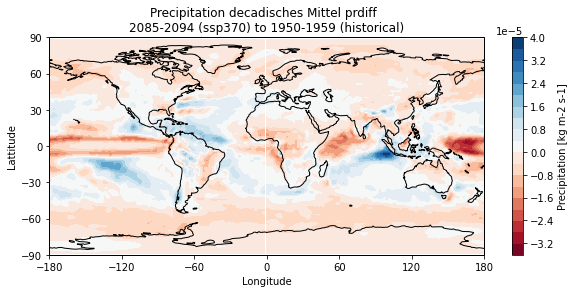

In [9]:
# plot


# chose one of the ds
lons = ds_ssp['lon']
lats = ds_ssp['lat'] #x


fig = plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# so mittelt man ueber die ersten 10 Jahre
pr10=ds_his['pr'].isel(time=slice(0,10*12)).mean('time')

# so berechnet man den MW der 10 Jahre rueckwaerts von 240 Zeitschritten
pr10end=ds_ssp['pr'].isel(time=slice(240-10*12,240)).mean('time')

# difference 
prdiff = pr10 - pr10end

# argumente: countourf(x, y, z, zbins, 
p = plt.contourf(lons, lats, prdiff, 20,
            # transform of the projection, color map = red/blue scale for color blinds
               transform=ccrs.PlateCarree(), cmap='RdBu')


# -- label
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')

# -- per Hand
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_yticks([-90,-60,-30,0,30,60,90])

# -- statt der letzten 4 code zeilen, sind eine hübschere Alternative


# draw colorbar
c = plt.colorbar(p)

#print(ds_his['pr'].attrs['units'])

# for plot title
plottitle = ds_his['pr'].attrs['long_name']
c.ax.set_ylabel(plottitle + ' ['+ ds_his['pr'].attrs['units'] +']')

# string datetime
strdt =' \n2085-2094 (ssp370) to 1950-1959 (historical)'  
pname = plottitle + ' decadisches Mittel prdiff '+ strdt 

plt.title(pname)

# save before show()
pname='/tmp/c.png'
plt.savefig(pname)
plt.show()

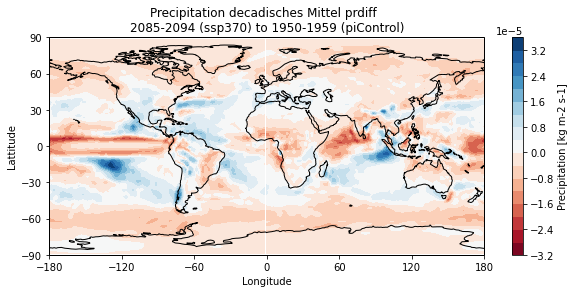

In [10]:
# plot


# chose one of the ds
lons = ds_ssp['lon']
lats = ds_ssp['lat'] #x


fig = plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# so mittelt man ueber die ersten 10 Jahre
pr10=ds_pi['pr'].isel(time=slice(0,10*12)).mean('time')

# so berechnet man den MW der 10 Jahre rueckwaerts von 240 Zeitschritten
pr10end=ds_ssp['pr'].isel(time=slice(240-10*12,240)).mean('time')

# difference 
prdiff = pr10 - pr10end

# argumente: countourf(x, y, z, zbins, 
p = plt.contourf(lons, lats, prdiff, 20,
            # transform of the projection, color map = red/blue scale for color blinds
               transform=ccrs.PlateCarree(), cmap='RdBu')


# -- label
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')

# -- per Hand
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_yticks([-90,-60,-30,0,30,60,90])

# -- statt der letzten 4 code zeilen, sind eine hübschere Alternative


# draw colorbar
c = plt.colorbar(p)

#print(ds_pi['pr'].attrs['units'])

# for plot title
plottitle = ds_pi['pr'].attrs['long_name']
c.ax.set_ylabel(plottitle + ' ['+ ds_pi['pr'].attrs['units'] +']')

# string datetime
strdt =' \n2085-2094 (ssp370) to 1950-1959 (piControl)'  
pname = plottitle + ' decadisches Mittel prdiff '+ strdt 

plt.title(pname)

# save before show()
pname='/tmp/c.png'
plt.savefig(pname)
plt.show()